In [1]:
# Comparing the height of wooden, steel, and plastic roller coasters
import pandas as pd, numpy as np, matplotlib.pyplot as plt, scipy.stats as stats, seaborn as sns
%matplotlib inline

soc_survey = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")
soc_survey = soc_survey.dropna(how='any')
soc_survey.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


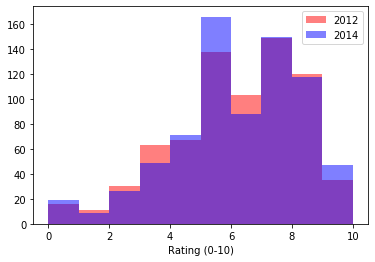

Ttest_indResult(statistic=-0.7156974792217816, pvalue=0.4742916002909491)


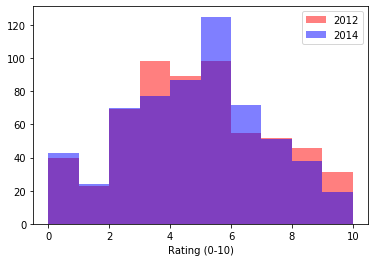

Ttest_indResult(statistic=0.34075433231518504, pvalue=0.7333479315909976)


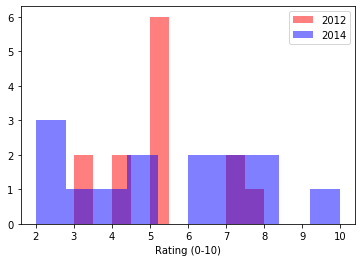

Ttest_indResult(statistic=-0.3466213170125284, pvalue=0.7317764273785732)


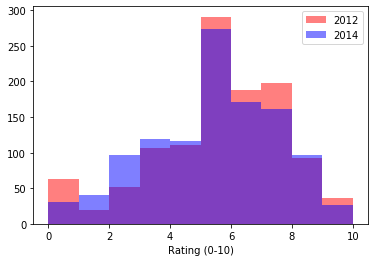

Ttest_indResult(statistic=2.1000674443244907, pvalue=0.03583204193521363)


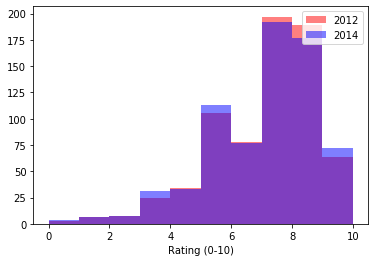

Ttest_indResult(statistic=0.5119224181145228, pvalue=0.6087850218131978)


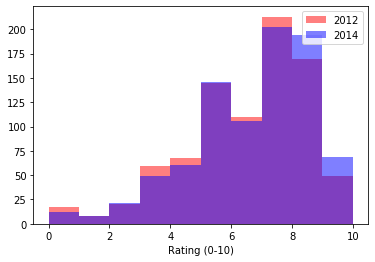

Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.0428293634522298)


In [11]:
#1
survey_CH = soc_survey[soc_survey['cntry']=='CH']
survey_CZ = soc_survey[soc_survey['cntry']=='CZ']
survey_DE = soc_survey[soc_survey['cntry']=='DE']
survey_ES = soc_survey[soc_survey['cntry']=='ES']
survey_NO = soc_survey[soc_survey['cntry']=='NO']
survey_SE = soc_survey[soc_survey['cntry']=='SE']

by_cntry = [survey_CH, survey_CZ, survey_DE, survey_ES, survey_NO, survey_SE]

def trust_plot_by_year(survey):
    plt.hist(survey[survey['year']==6].ppltrst, color='red', label='2012', alpha=0.5)
    plt.hist(survey[survey['year']==7].ppltrst, color='blue', label='2014', alpha=0.5)
    plt.xlabel('Rating (0-10)')
    plt.legend(loc='upper right')
    plt.show()
    
    print(stats.ttest_ind(survey[survey['year']==6].ppltrst, survey[survey['year']==7].ppltrst))

for cntry in by_cntry:
    trust_plot_by_year(cntry)

I compared the trustworthiness factor by first isolating each country, then compared a distribution of the data for 2012 and 2014. The data appeared to be normal so I chose to use t-test to determine significance. I found that there was no change in trustworthiness for Switzerland, the Czech Republic, Germany, or Norway. For Spain, it appears there was a statistically significant increase in trust. The only country that became less trusting was Sweden.

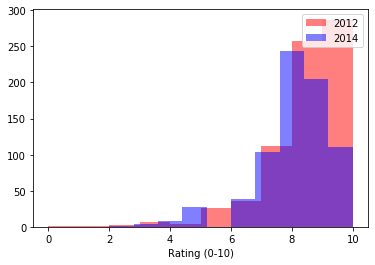

Ttest_indResult(statistic=-0.812142488327401, pvalue=0.4168411011770018)
KruskalResult(statistic=0.7393607796289999, pvalue=0.3898657201494511)


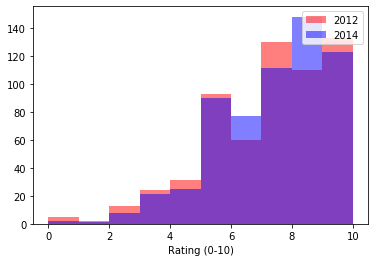

Ttest_indResult(statistic=-1.1592536826704618, pvalue=0.24658245820500238)
KruskalResult(statistic=0.7888702806828175, pvalue=0.37444194652901)


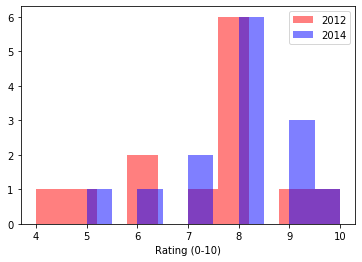

Ttest_indResult(statistic=-0.966317541228559, pvalue=0.3431409128727073)
KruskalResult(statistic=0.7954545454545382, pvalue=0.3724558699813717)


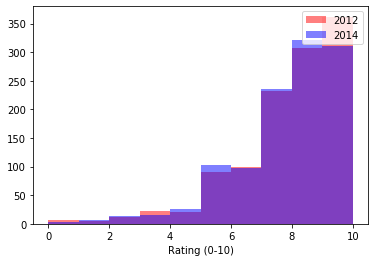

Ttest_indResult(statistic=1.3750588408504656, pvalue=0.16924771370417369)
KruskalResult(statistic=2.9615793608595036, pvalue=0.08526461865591295)


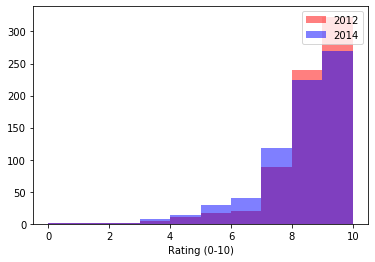

Ttest_indResult(statistic=4.152957205997266, pvalue=3.4778681704487346e-05)
KruskalResult(statistic=17.78863118177249, pvalue=2.4685385809958533e-05)


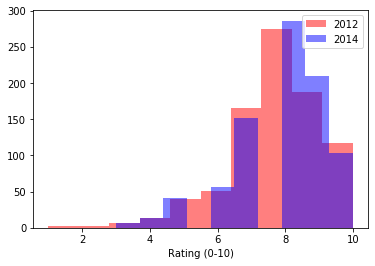

Ttest_indResult(statistic=-0.5372790210326394, pvalue=0.5911442306272388)
KruskalResult(statistic=0.10011450993142058, pvalue=0.7516922609168144)


In [9]:
#2
def happy_plot_by_year(survey):
    plt.hist(survey[survey['year']==6].happy, color='red', label='2012', alpha=0.5)
    plt.hist(survey[survey['year']==7].happy, color='blue', label='2014', alpha=0.5)
    plt.xlabel('Rating (0-10)')
    plt.legend(loc='upper right')
    plt.show()
    
    print(stats.ttest_ind(survey[survey['year']==6].happy, survey[survey['year']==7].happy))
    print(stats.kruskal(survey[survey['year']==6].happy, survey[survey['year']==7].happy))

for cntry in by_cntry:
    happy_plot_by_year(cntry)

For evaluating happiness, I decided to use Kruskal-Wallace because of the non-normal distribution. I also used t-test for comparison and found that both tests indicated no significant change in the happiness for Switzerland, the Czech Republic, Germany, Spain, or Sweden. Only Norway had a significant positive change in happiness.

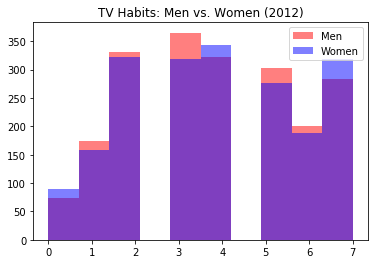

Ttest_indResult(statistic=-0.7323552192640558, pvalue=0.4639939646110154)
KruskalResult(statistic=0.6145695087428265, pvalue=0.4330724786171142)


In [14]:
#3
survey_2012 = soc_survey[soc_survey['year']==6]

plt.hist(survey_2012[survey_2012['gndr']==1].tvtot, color='red', label='Men', alpha=0.5)
plt.hist(survey_2012[survey_2012['gndr']==2].tvtot, color='blue', label='Women', alpha=0.5)
plt.legend(loc='upper right')
plt.title('TV Habits: Men vs. Women (2012)')
plt.show()

print(stats.ttest_ind(survey_2012[survey_2012['gndr']==1].tvtot, survey_2012[survey_2012['gndr']==2].tvtot))
print(stats.kruskal(survey_2012[survey_2012['gndr']==1].tvtot, survey_2012[survey_2012['gndr']==2].tvtot))

Because the TV variable is categorical the distribution appears non-normal. I ran both t-test and kruskal-wallace and neither noted a significant difference in the TV habits of men versus women.

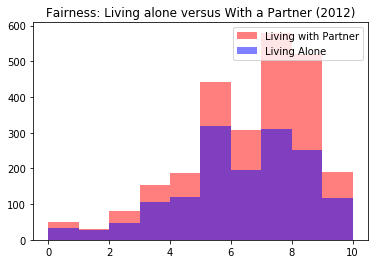

Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)
KruskalResult(statistic=11.887452362061, pvalue=0.0005651336752494688)


In [15]:
#4
survey_2012 = soc_survey[soc_survey['year']==6]

plt.hist(survey_2012[survey_2012['partner']==1].pplfair, color='red', label='Living with Partner', alpha=0.5)
plt.hist(survey_2012[survey_2012['partner']==2].pplfair, color='blue', label='Living Alone', alpha=0.5)
plt.legend(loc='upper right')
plt.title('Fairness: Living alone versus With a Partner (2012)')
plt.show()

print(stats.ttest_ind(survey_2012[survey_2012['partner']==1].pplfair, survey_2012[survey_2012['partner']==2].pplfair))
print(stats.kruskal(survey_2012[survey_2012['partner']==1].pplfair, survey_2012[survey_2012['partner']==2].pplfair))


Both kruskal and t-test indicate a significant increase in the level of fairness for people living with a partner.

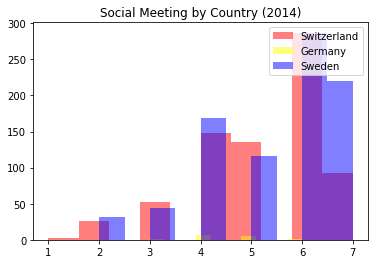

10.62913304641007 
 2.5931822091991717e-05
Ttest_indResult(statistic=2.137774079859156, pvalue=0.032855611686425916)
Ttest_indResult(statistic=-3.8811664926200904, pvalue=0.00010815819723507566)
Ttest_indResult(statistic=2.739042801007487, pvalue=0.006286550691196736)


In [19]:
#5
survey_2014 = soc_survey[soc_survey['year']==7]

plt.hist(survey_2014[survey_2014['cntry']=='CH'].sclmeet, color='red', label='Switzerland', alpha=.5)
plt.hist(survey_2014[survey_2014['cntry']=='DE'].sclmeet, color='yellow', label='Germany', alpha=.5)
plt.hist(survey_2014[survey_2014['cntry']=='SE'].sclmeet, color='blue', label='Sweden', alpha=.5)
plt.legend(loc='upper right')
plt.title('Social Meeting by Country (2014)')
plt.show()


F, p = stats.f_oneway(
    survey_2014[survey_2014['cntry']=='CH'].sclmeet,
    survey_2014[survey_2014['cntry']=='DE'].sclmeet,
    survey_2014[survey_2014['cntry']=='SE'].sclmeet)
print(F, '\n', p)

print(stats.ttest_ind(survey_2014[survey_2014['cntry']=='CH'].sclmeet, survey_2014[survey_2014['cntry']=='DE'].sclmeet))
print(stats.ttest_ind(survey_2014[survey_2014['cntry']=='CH'].sclmeet, survey_2014[survey_2014['cntry']=='SE'].sclmeet))
print(stats.ttest_ind(survey_2014[survey_2014['cntry']=='SE'].sclmeet, survey_2014[survey_2014['cntry']=='DE'].sclmeet))

It appears all three countries have a significant difference in the number of social meetings.

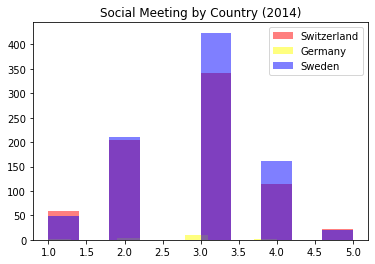

2.422927787154441 
 0.08898269112207814
Ttest_indResult(statistic=0.28869953984944624, pvalue=0.7728905598034453)
Ttest_indResult(statistic=-2.138086758045346, pvalue=0.03266006699743851)
Ttest_indResult(statistic=0.7120803198617717, pvalue=0.47660399113995766)


In [21]:
#6
plt.hist(survey_2014[survey_2014['cntry']=='CH'].sclact, color='red', label='Switzerland', alpha=.5)
plt.hist(survey_2014[survey_2014['cntry']=='DE'].sclact, color='yellow', label='Germany', alpha=.5)
plt.hist(survey_2014[survey_2014['cntry']=='SE'].sclact, color='blue', label='Sweden', alpha=.5)
plt.legend(loc='upper right')
plt.title('Social Meeting by Country (2014)')
plt.show()


F, p = stats.f_oneway(
    survey_2014[survey_2014['cntry']=='CH'].sclact,
    survey_2014[survey_2014['cntry']=='DE'].sclact,
    survey_2014[survey_2014['cntry']=='SE'].sclact)
print(F, '\n', p)

print(stats.ttest_ind(survey_2014[survey_2014['cntry']=='CH'].sclact, survey_2014[survey_2014['cntry']=='DE'].sclact))
print(stats.ttest_ind(survey_2014[survey_2014['cntry']=='CH'].sclact, survey_2014[survey_2014['cntry']=='SE'].sclact))
print(stats.ttest_ind(survey_2014[survey_2014['cntry']=='SE'].sclact, survey_2014[survey_2014['cntry']=='DE'].sclact))

For social activities, it appears that the only significant difference is between Switzerland and Sweden.